#Created by-Mrs.Vandana Anil Kadam

# PROBLEM STATEMENT
#Predict the score of riders/count based on the no. of riding hours.

# problem statement
# A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
# We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Findings About dataset

#Dataset has 10886 rows and 12 columns.

Except one column, all other are either float or integer type.

One column is string or object date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

# Import necessecities

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Reading Data

In [ ]:
#With help pandas dataframe
df=pd.read_csv("/content/bikeshare.csv")

In [ ]:
#Read the data
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#How much long and broad
df.shape

(10886, 12)

# Basic EDA

In [ ]:
#which are the columns of our dataset
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#  numerical data

In [ ]:

#Describing  numerical data
df.describe(include=[np.number])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##lets see the categorical variables of our dataset

In [ ]:
#lets see the categorical variables of our dataset
#Describing non numerical data(categorical features)
df.describe(exclude=[np.number])

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
#  data types of our dataset
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
#quick view of ourdataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#basic statastical information of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [ ]:
#lets see missing values of our dataset
df.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# how many nan or null values in our dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
#lets check length of data
len(df)

10886

In [ ]:
#let's see how many nulls/missing values in our dataset percentages of each column
df.isnull().mean()*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

#Corelation metrics

<ipython-input-224-a6bbf89b7873>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation_metrics=df.corr()


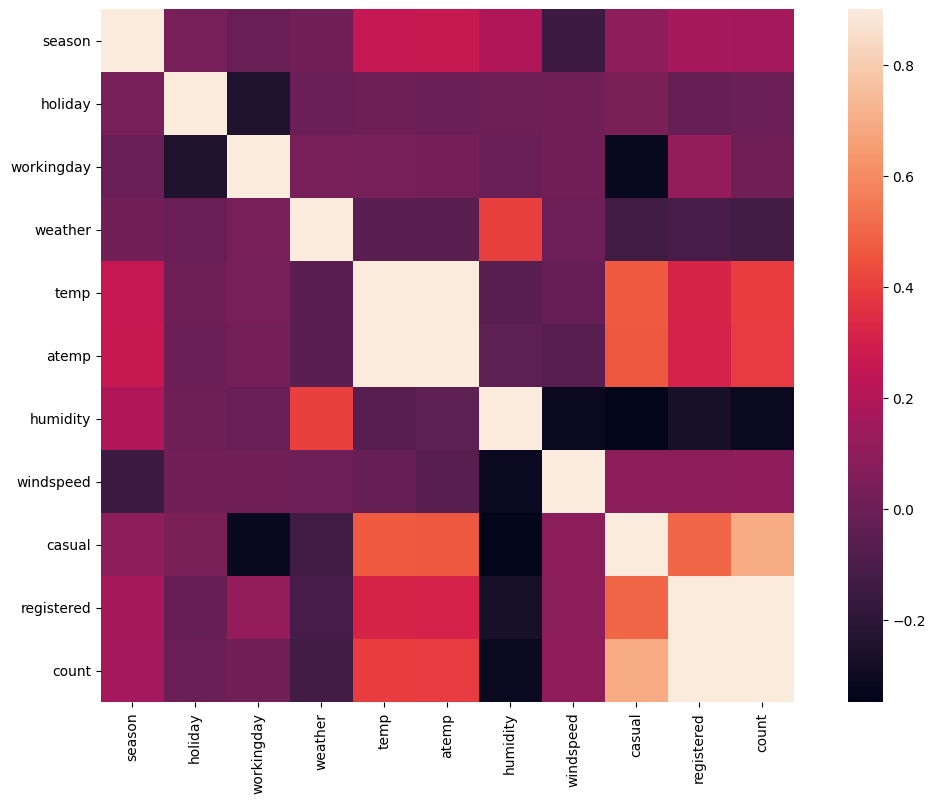

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610 

In [ ]:
#corelation metrics
corelation_metrics=df.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(corelation_metrics,vmax=.9,square=True)#annot=value
plt.show()
print(corelation_metrics)

In [ ]:
#showing corelation of features to each other
df.corr()

<ipython-input-225-269967411598>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


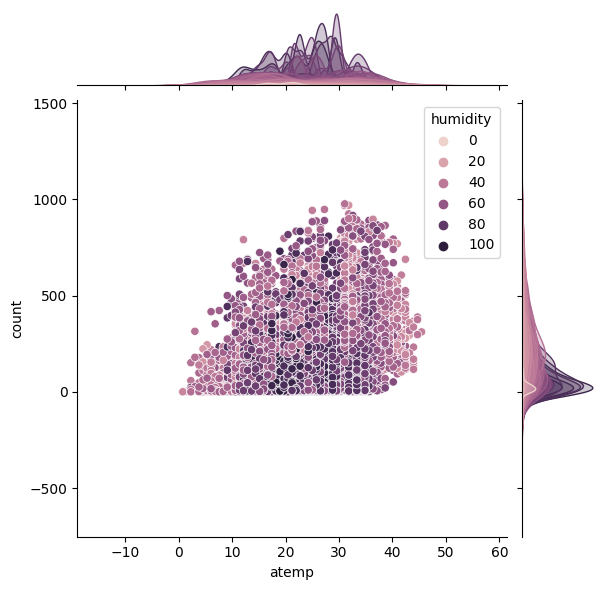

In [ ]:
sns.jointplot(x="atemp",y="count",hue="humidity",data=df)
plt.show()

# Visualization

In [ ]:
#the overview of the dataset
#sns.pairplot(df,hue='humidity')

#Finding
#There are no missing / Null values either in columns or rows

<Axes: >

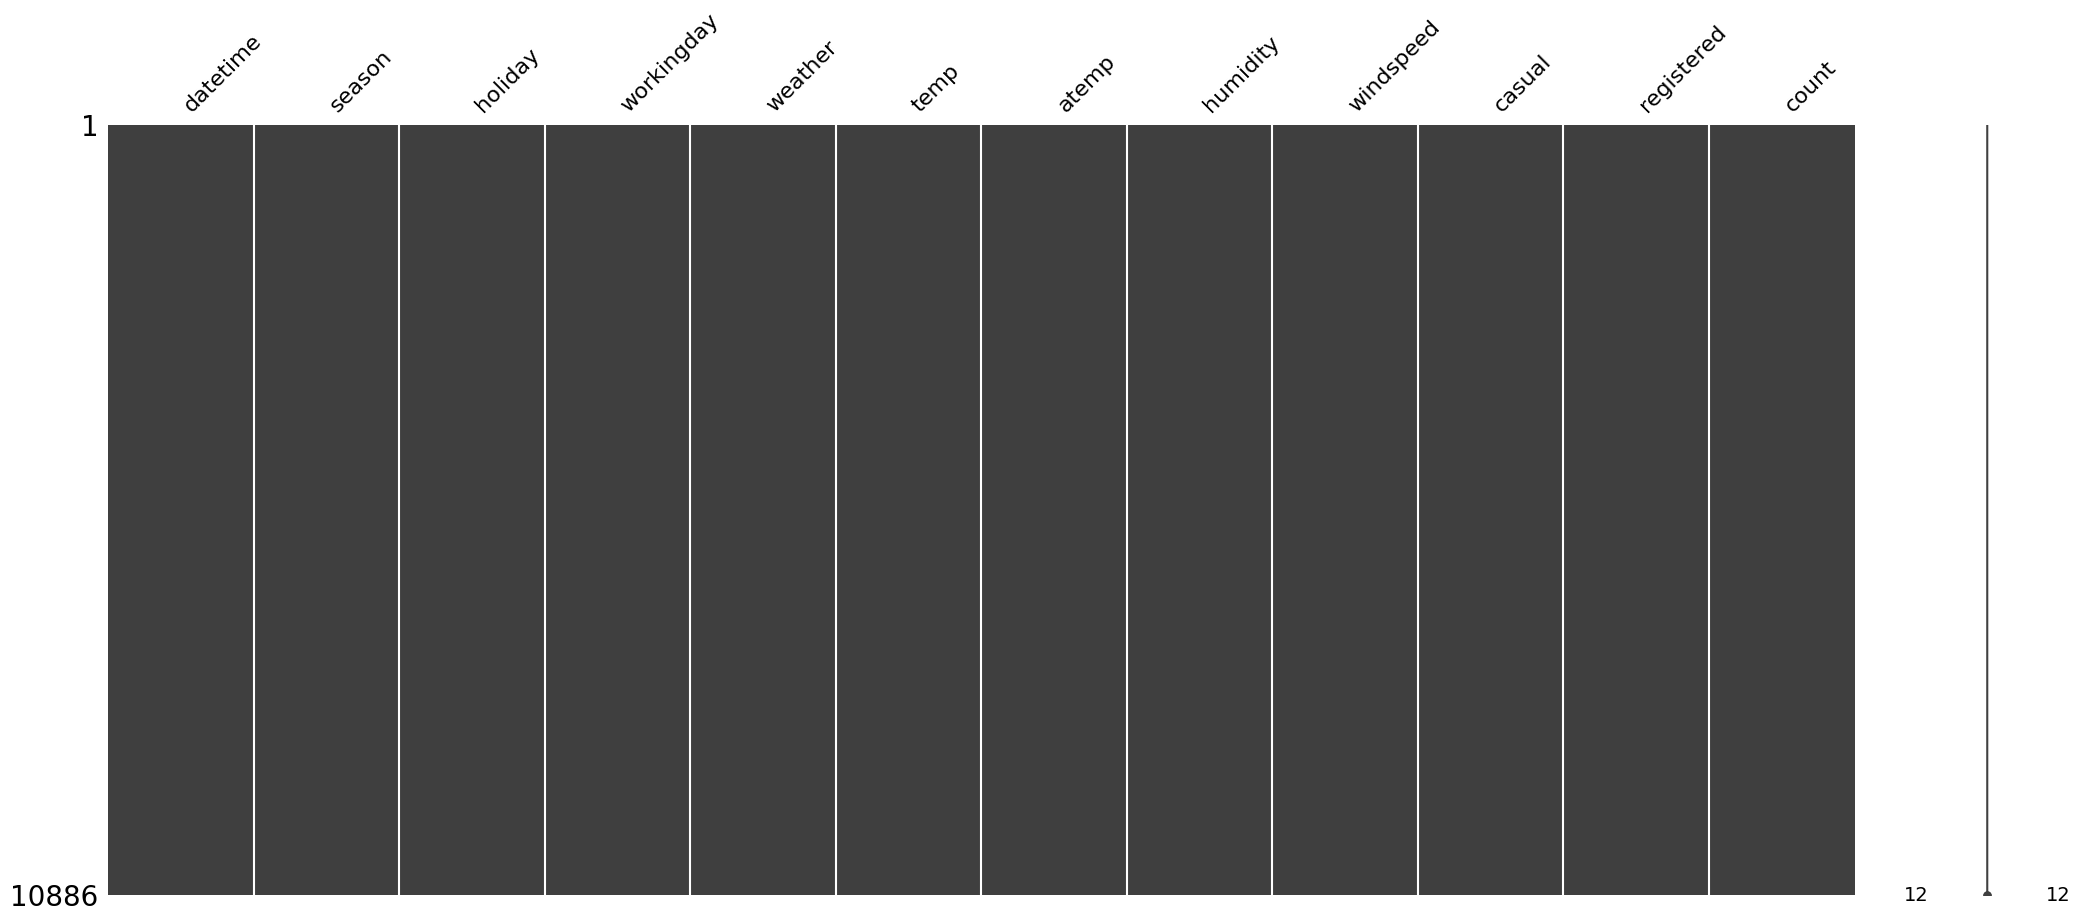

In [ ]:
#visualization of our missing values with the help of missingno
msno.matrix(df)

In [ ]:
#By using heatmap lets check missinvalues of our dataset
#sns.heatmap

In [ ]:
df_duplicate=df.copy()
# lets check and drop if there are duplicate row if any
df_duplicate.drop_duplicates(subset=None,inplace=True)

In [ ]:
df_duplicate.shape

(10886, 12)

In [ ]:
# Lets check the outliers of our dataset and remove it
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


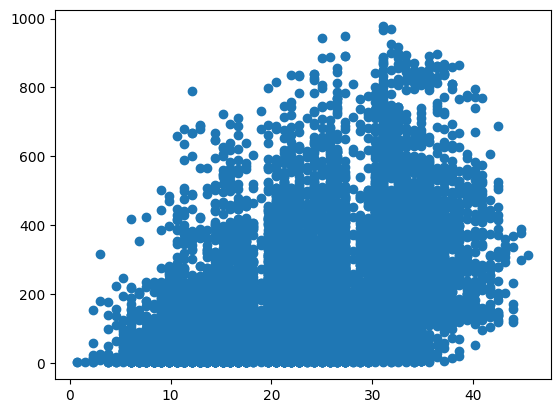

In [ ]:
plt.scatter(x="atemp",y="count",data=df)
plt.show()

In [ ]:
df.shape

(10886, 12)

In [ ]:
# Target variable
len(df["count"].unique())

822

In [ ]:
#target variable
df["count"].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

In [ ]:
#target variable
df.groupby("count").mean().T

<ipython-input-237-eaa47cfc49f6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("count").mean().T


count,1,2,3,4,5,6,7,8,9,10,...,897,900,901,917,925,943,948,968,970,977
season,1.485714,1.810606,1.986111,2.255034,2.520710,2.577778,2.576271,2.565657,2.542169,2.778947,...,3.000,4.0000,4.0000,4.000,3.0000,4.000,4.0000,3.0000,3.00,3.0000
holiday,0.009524,0.007576,0.027778,0.046980,0.005917,0.037037,0.016949,0.050505,0.000000,0.010526,...,0.000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.00,0.0000
workingday,0.800000,0.810606,0.812500,0.818792,0.792899,0.740741,0.762712,0.707071,0.674699,0.652632,...,1.000,1.0000,1.0000,1.000,1.0000,1.000,1.0000,1.0000,1.00,1.0000
weather,1.504762,1.545455,1.604167,1.449664,1.520710,1.414815,1.415254,1.454545,1.493976,1.315789,...,1.000,1.0000,1.0000,1.000,1.0000,1.000,1.0000,1.0000,1.00,1.0000
temp,10.956762,13.424394,14.201944,16.212886,17.564497,19.151556,17.275593,17.832929,17.338554,18.368000,...,33.620,28.7000,28.7000,28.700,28.7000,21.320,23.7800,25.4200,28.70,27.0600
atemp,13.398381,16.368258,17.218889,19.412416,20.907130,22.531037,20.518771,21.036162,20.363313,21.897947,...,36.365,31.8200,32.5750,32.575,31.8200,25.000,27.2750,31.0600,31.82,31.0600
humidity,65.752381,69.810606,70.527778,75.302013,72.656805,73.896296,73.254237,74.414141,71.939759,72.642105,...,34.000,42.0000,51.0000,65.000,41.0000,39.000,43.0000,35.0000,28.00,44.0000
windspeed,13.952782,12.174357,11.375297,10.758716,10.870056,9.637627,10.915663,9.495457,11.349719,9.632343,...,12.998,11.0014,15.0013,0.000,19.9995,12.998,15.0013,19.9995,0.00,16.9979
casual,0.085714,0.250000,0.312500,0.563758,0.668639,0.888889,1.144068,1.393939,1.457831,1.831579,...,130.000,158.0000,112.0000,84.000,114.0000,104.000,91.0000,111.0000,168.00,91.0000
registered,0.914286,1.750000,2.687500,3.436242,4.331361,5.111111,5.855932,6.606061,7.542169,8.168421,...,767.000,742.0000,789.0000,833.000,811.0000,839.000,857.0000,857.0000,802.00,886.0000


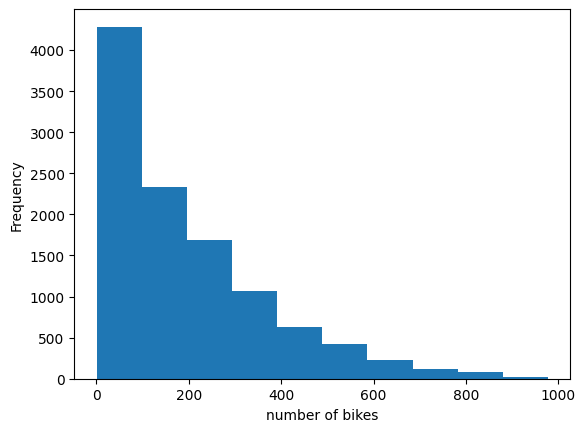

In [ ]:
#target variable
plt.hist(df['count'])
plt.xlabel('number of bikes')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='season', ylabel='count'>

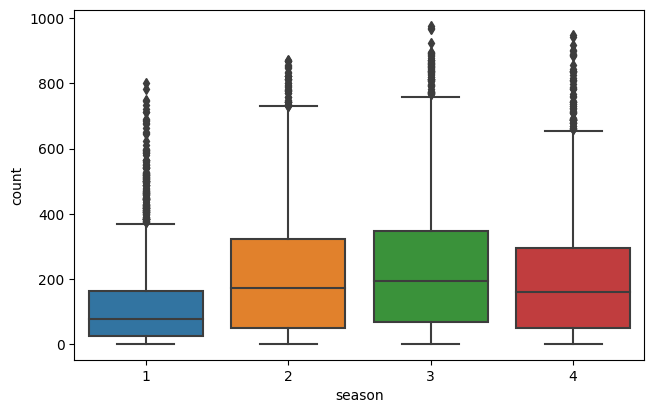

In [ ]:
# Visualising numeric variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = df)

<Axes: xlabel='weather', ylabel='count'>

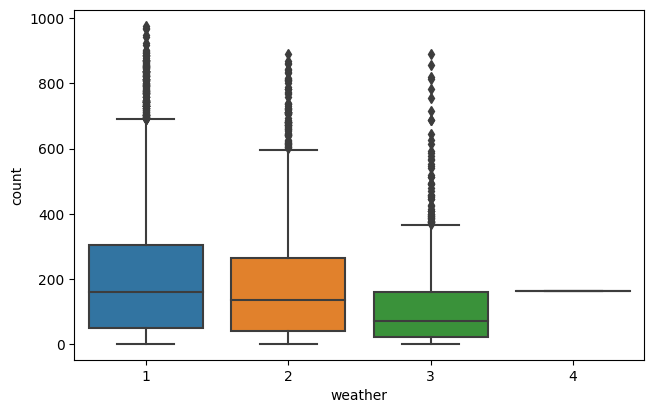

In [ ]:
# Visualising numeric variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'weather', y = 'count', data = df)

<Axes: xlabel='holiday', ylabel='count'>

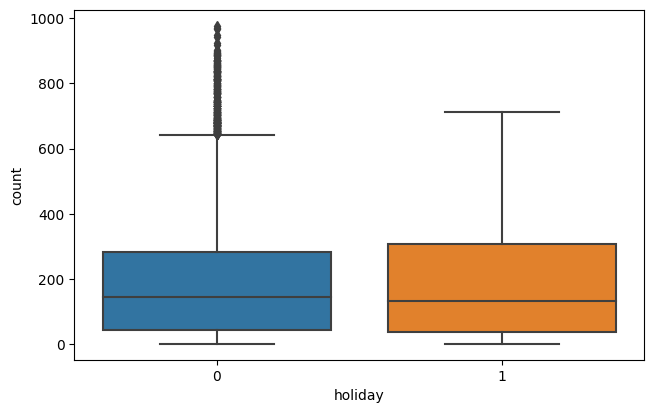

In [ ]:
# Visualising numeric variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'count', data = df)

<Axes: xlabel='windspeed', ylabel='count'>

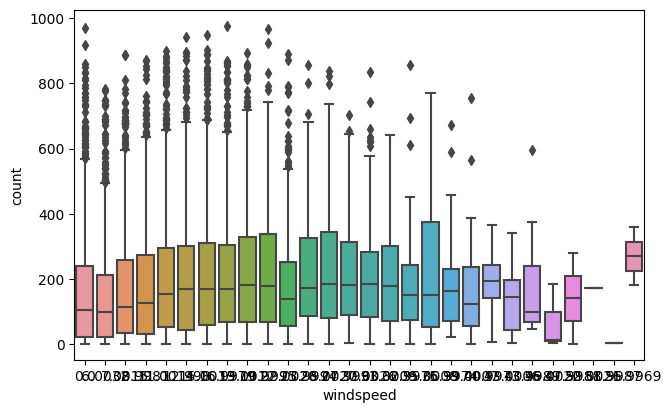

In [ ]:
# Visualising numeric variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'windspeed', y = 'count', data = df)

<Axes: xlabel='workingday', ylabel='count'>

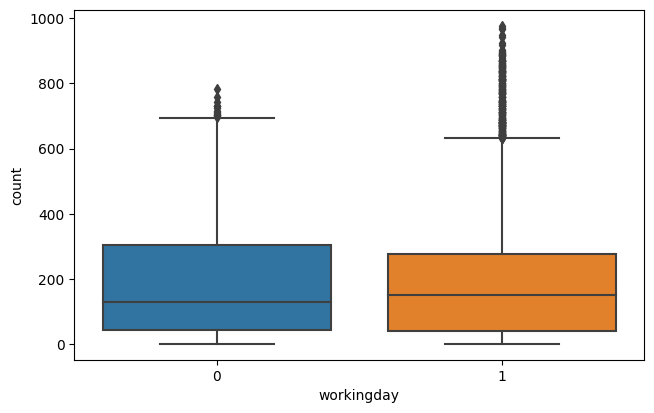

In [ ]:
# Visualising numeric variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'workingday', y = 'count', data = df)

<Axes: xlabel='temp', ylabel='count'>

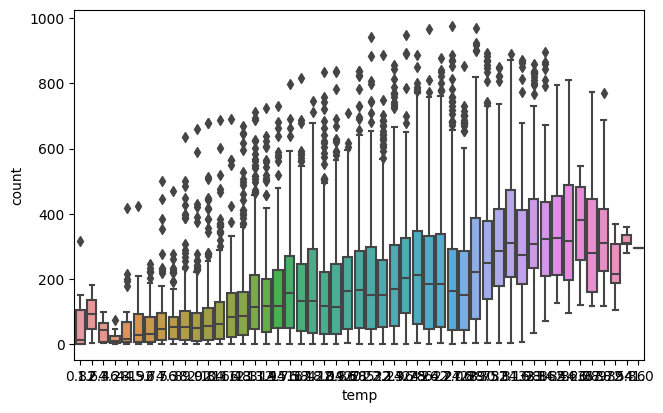

In [ ]:
# Visualising numeric variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'temp', y = 'count', data = df)

<Axes: xlabel='atemp', ylabel='count'>

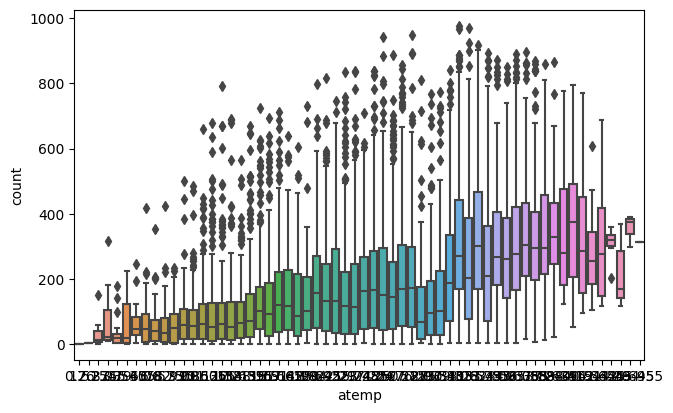

In [ ]:
# Visualising numeric variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'atemp', y = 'count', data = df)

<Axes: xlabel='casual', ylabel='count'>

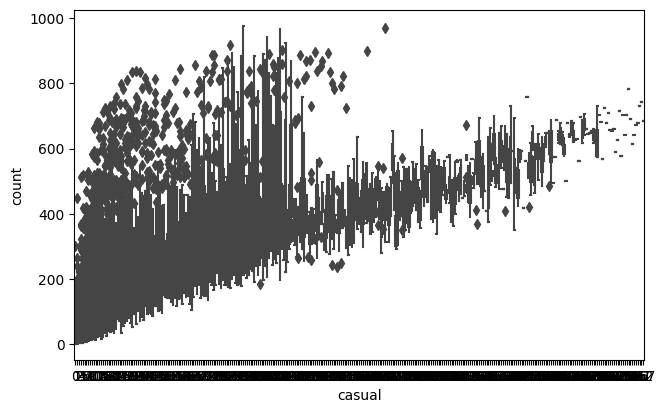

In [ ]:
# Visualising numeric variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'casual', y = 'count', data = df)

<Axes: xlabel='humidity', ylabel='count'>

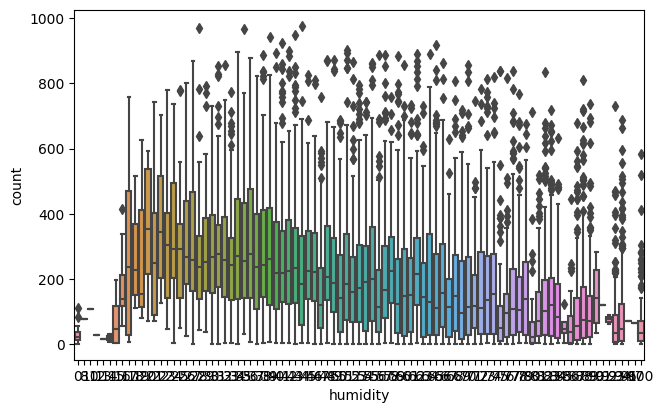

In [ ]:
# Visualising numeric variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'humidity', y = 'count', data = df)

<Axes: xlabel='count', ylabel='weather'>

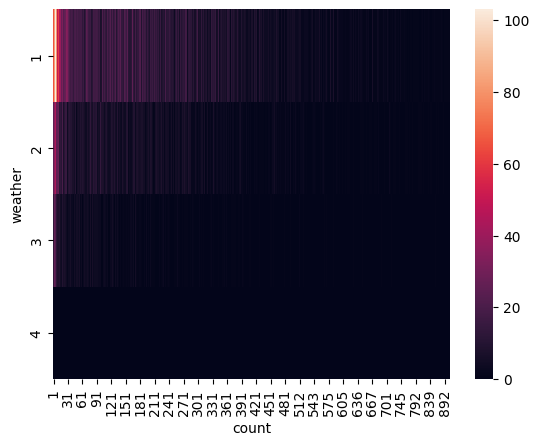

In [ ]:
sns.heatmap(pd.crosstab(df["weather"],df["count"]))

<Axes: xlabel='registered', ylabel='count'>

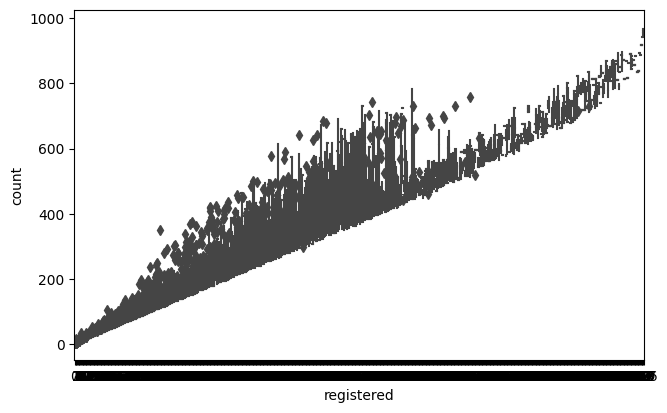

In [ ]:
# Visualising numeric variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'registered', y = 'count', data = df)

# # Visualizing categoricals

<Axes: ylabel='datetime'>

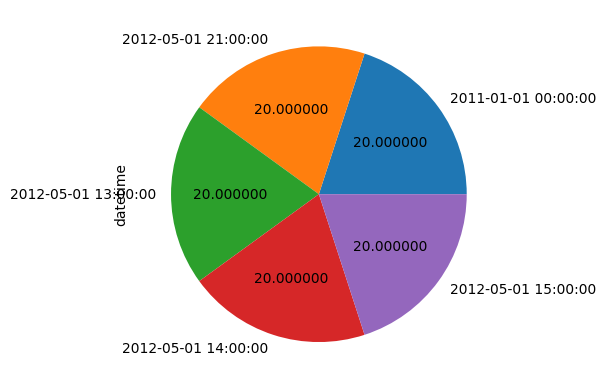

In [ ]:
#pie chart
df["datetime"].value_counts()[:5].plot(kind="pie",autopct="%2f")

##  Data cleaning

#Cast "datetime" to actually be a datetime

In [ ]:
#our datetime column is string/object datatype,lets convert it in int64
df['datetime']= pd.to_datetime(df['datetime'])

In [ ]:
df=df[df['weather'] !=4]

In [ ]:
# Drop the columns "casual" and "registered"
df.drop(columns=["casual","registered"],inplace=True)

<ipython-input-253-581399950b49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["casual","registered"],inplace=True)


In [ ]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
dtype: object

# Data prepration

In [ ]:
#take hourly data for modeling from datetime column
df['hour']=df['datetime'].dt.hour

<ipython-input-255-5f987ac61b1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']=df['datetime'].dt.hour


In [ ]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
hour                   int64
dtype: object

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4


# Feature Selection

##take an hourly data for modeling from datetime column

# we are droping columns like casual,registered

# we are not using atemp.

#Feature Engineering

In [ ]:
xvars = [
    "season", "holiday", "workingday",
    "weather", "temp", "humidity",
    "windspeed", "hour"
]

In [ ]:
X = df[xvars]

In [ ]:
X= pd.get_dummies(columns=["season", "weather", "hour"], data=X, drop_first=True)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4


In [ ]:
df.shape

(10885, 11)

#  Define X and y

In [ ]:
y=df['count']

In [ ]:
X.shape

(10885, 33)

In [ ]:
X

,holiday,workingday,temp,humidity,windspeed,season_2,season_3,season_4,weather_2,weather_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,81,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,80,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,80,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,75,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,75,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,26.0027,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
10882,0,1,14.76,57,15.0013,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10883,0,1,13.94,61,15.0013,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10884,0,1,13.94,61,6.0032,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#sns.pairplot(pd.merge(X,y,left_index=True,right_index=True))

#Data standardization with StandardScaler

#Lets make data mean centered and scaled

In [ ]:
#data scaling using min-max scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_sc = scaler.fit_transform(X)

In [ ]:
#after scaling our X
print(X_sc)

[[-0.17149859 -1.46057378 -1.3338874  ... -0.2091034  -0.2091034
  -0.2091034 ]
 [-0.17149859 -1.46057378 -1.4391406  ... -0.2091034  -0.2091034
  -0.2091034 ]
 [-0.17149859 -1.46057378 -1.4391406  ... -0.2091034  -0.2091034
  -0.2091034 ]
 ...
 [-0.17149859  0.68466244 -0.80762135 ...  4.78232308 -0.2091034
  -0.2091034 ]
 [-0.17149859  0.68466244 -0.80762135 ... -0.2091034   4.78232308
  -0.2091034 ]
 [-0.17149859  0.68466244 -0.91287456 ... -0.2091034  -0.2091034
   4.78232308]]


#TRAIN TEST SPLIT

In [ ]:
#let it put in train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.20,random_state=42)

In [ ]:
X_train.shape

(8708, 33)

In [ ]:
X_test.shape

(2177, 33)

In [ ]:
y_train.shape

(8708,)

In [ ]:
y_test.shape

(2177,)

In [ ]:
# Instantiate the model
from sklearn.linear_model import LinearRegression
from sklearn import metrics # metrics SSE MSE RMSE MAE
model=LinearRegression()

In [ ]:
# Fit support vector machine to training data.
model.fit (X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_train,y_train)

0.6359553942514538

In [ ]:
model.score(X_test,y_test)

0.6165445892857548

In [ ]:
# Look into the intercept and Coef

print(model.intercept_)

190.6197015290718


In [ ]:
print(model.coef_)

[ -1.81245659   0.79681319  51.01079304 -18.32184174  -6.64897983
  16.47372877   7.59559357  28.95181037  -2.96830139 -17.22495683
  -3.18904479  -4.6890801   -6.88519376  -7.19684946  -4.18742203
   7.72960415  34.02405391  63.43376446  33.64315336  21.74532342
  26.18602262  33.61359263  32.96422677  30.46928386  31.39897994
  44.49623598  75.26563171  69.32012941  48.12409442  31.01684954
  21.14312769  14.80691236   7.01563209]


# Our model is best fit model but the score is not so high.

# Make predictions

In [ ]:
# Generate predictions.
y_preds = model.predict(X_test)

In [ ]:
y_preds

array([ 291.23432299,  -24.50525318,   20.03645292, ..., -100.8131577 ,
        101.3183076 ,  -66.0961064 ])

# Evaluate the model

In [ ]:
# R2:
metrics.r2_score(y_test,y_preds)

0.6165445892857548

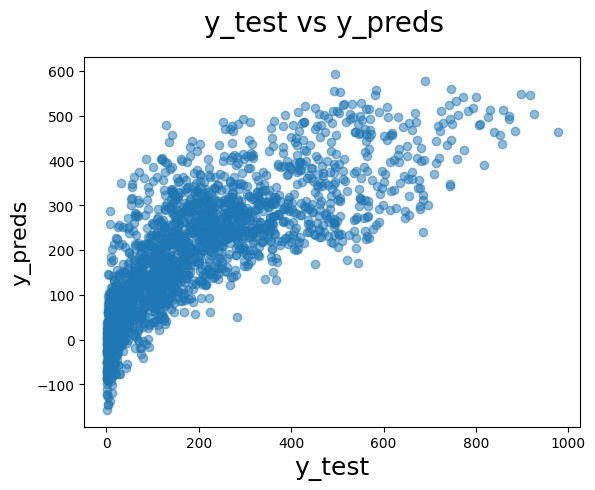

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_preds, alpha=.5)
fig.suptitle('y_test vs y_preds', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_preds', fontsize = 16)
plt.show()

In [ ]:
# MSE:
metrics.mean_squared_error(y_test,y_preds)

13080.015931555212

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_preds)))

RMSE: 114.3678972944559


<ipython-input-287-a4d17e7366a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_preds)


<Axes: xlabel='count', ylabel='Density'>

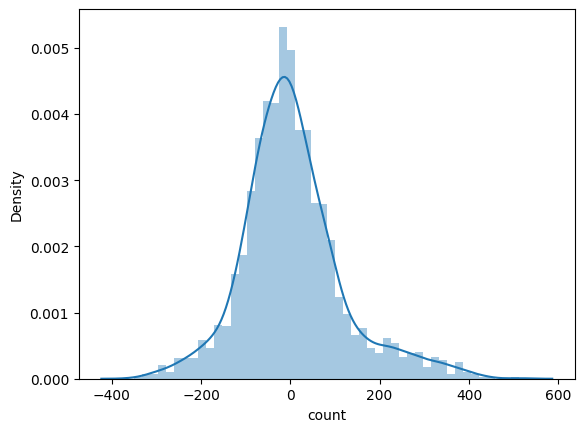

In [ ]:
import seaborn as sns
sns.distplot(y_test-y_preds)

# cross validation on linear regression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
val_score=cross_val_score(model,X_train,y_train.ravel(),cv=3)

In [ ]:
val_score.mean()

0.6318992456442535

In [ ]:
val_score.std()

0.01550430011234411

# Random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=1000,max_depth=2,random_state=42)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, n_estimators=1000, random_state=42)

In [ ]:
y_pred=rf_reg.predict(X_test)

In [ ]:
y_pred

array([230.55108431, 147.05697439, 149.80890572, ..., 149.71539689,
       228.48978344, 147.14730084])

In [ ]:
# MSE:
metrics.mean_squared_error(y_test,y_pred)

24494.884010602993

In [ ]:
metrics.r2_score(y_test,y_pred)

0.2819048648080065

In [ ]:
mean_absolute_error(y_test,y_pred)

122.08262229870083